In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [26]:
data = pd.read_csv("D:/DatasetsVault/Salario/data_for_class.csv")

x1 = data.YearsExperience.min()
x2 = data.YearsExperience.max()

y1 = data.Salary.min()
y2 = data.Salary.max()


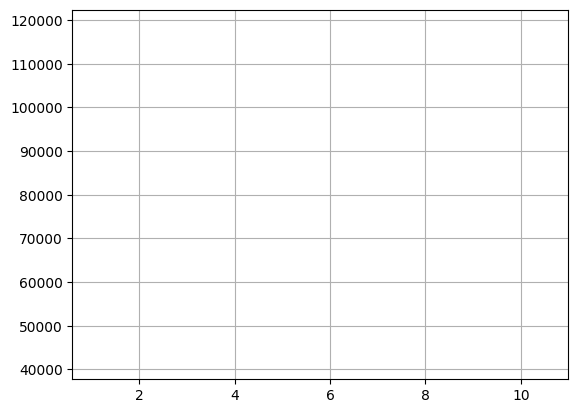

In [27]:
fig = plt.figure()
figura01, = plt.plot([],[], 'o')
plt.xlim(x1-0.5, x2+0.5)
plt.ylim(y1-0.5, y2+0.5)
figura01, = plt.plot([],[], 'o')
figura02, = plt.plot([], [], 'k-', linewidth=3)
plt.grid()

In [28]:
input01 = data.YearsExperience.values
output01 = data.Salary.values

In [29]:
def ModeloEstimacion(theta1, theta0, in01):
    return theta1*in01 + theta0

In [30]:
def CambioErrorTheta1(x_n, y_n, theta1, theta0, modelo):
    N = len(x_n)
    return (2/N)*np.sum((modelo(theta1, theta0, x_n)-y_n)*x_n)

def CambioErrorTheta0(x_n, y_n, theta1, theta0, modelo):
    N = len(x_n)
    return (2/N)*np.sum((modelo(theta1, theta0, x_n)-y_n))

In [31]:
k = 0
K = 10000

tet0 = 10*(random.random()-0.5)
tet1 = 10*(random.random()-0.5)
eta = 0.026
t1 = []
t0 = []
tol = 1e-5
q0 = 0

while k<K:
    k = k+1
    tet01 = tet0 - eta*CambioErrorTheta0(input01, output01, tet1, tet0, ModeloEstimacion)
    tet11 = tet1 - eta*CambioErrorTheta1(input01, output01, tet1, tet0, ModeloEstimacion)


    if np.abs(tet01 - tet0) < tol and np.abs(tet11 - tet1) < tol:
        print(k)
        break

    tet0 = tet01
    tet1 = tet11

    t0.append(tet0)
    t1.append(tet1)


1546


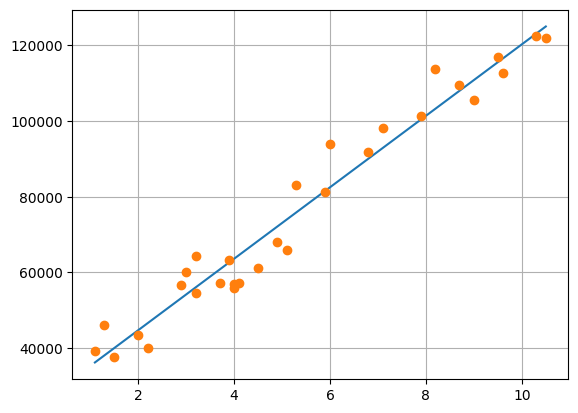

In [32]:
fig01 = plt.figure()
aa1,  = plt.plot(input01, ModeloEstimacion(tet1,tet0, input01))
aa1,  = plt.plot(input01, output01, 'o')
plt.grid()

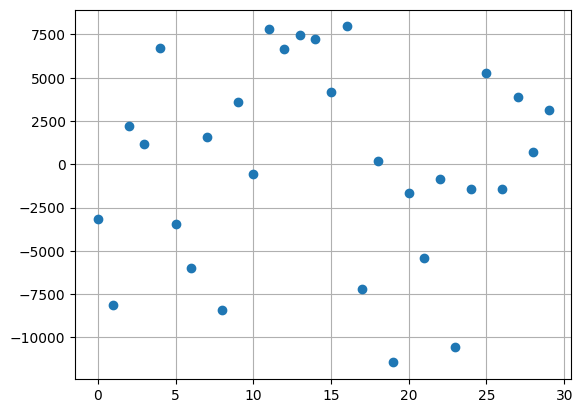

In [33]:
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import r2_score 

y_pred = ModeloEstimacion(tet1, tet0, data.YearsExperience.values)
Error = y_pred - data.Salary.values
coeficiente_determinacion = r2_score(data.Salary.values, y_pred)


fig01 = plt.figure()
aa1,  = plt.plot(Error,'o')
plt.grid()


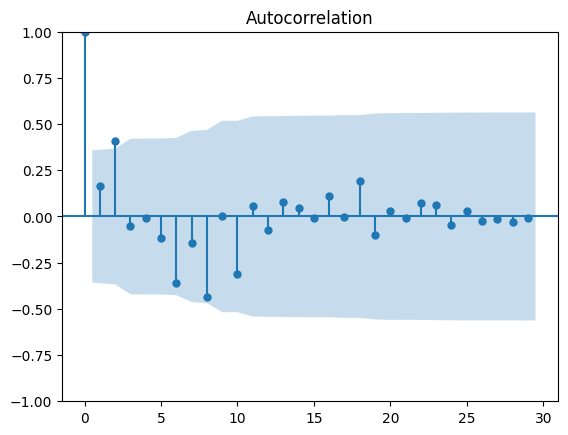

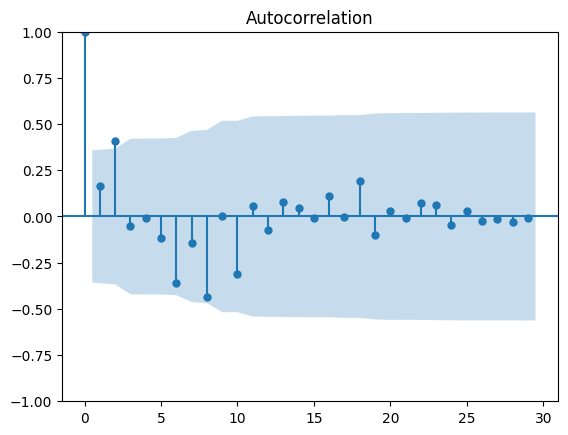

In [34]:

plot_acf(Error, lags=29)